# **EXIT TEST DSA DECEMBER 2023 BATCH.**

# **Data Science Problem Statement: Employee Attrition Prediction.**

## **Data Understanding and EDA.**

In [41]:
# importing libraries necessary for EDA and data preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [42]:
# loading the dataset and saving it as df
df = pd.read_csv('/content/Employee.csv')

In [43]:
#copying and saving the dataset as df inorder to retain the original dataset
data= df.copy()
data

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74493,16243,56,Female,42,Healthcare,7830,Poor,Medium,Average,0.0,...,0.0,Senior,Medium,60,No,No,No,Poor,Medium,Stayed
74494,47175,30,Female,15,Education,3856,Good,Medium,Average,2.0,...,0.0,Entry,Medium,20,No,No,No,Good,Medium,Left
74495,12409,52,Male,5,Education,5654,Good,Very High,Below Average,0.0,...,4.0,Mid,Small,7,No,No,No,Good,High,Left
74496,9554,18,Male,4,Education,5276,Fair,High,Average,0.0,...,3.0,Mid,Large,5,No,No,No,Poor,High,Stayed


In [23]:
# displays the column names
data.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

In [24]:
# gives the count of different datatypes variables in the dataset
data.dtypes.value_counts()

object     16
int64       6
float64     2
Name: count, dtype: int64

In [25]:
# to get an idea about our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               74498 non-null  int64  
 1   Age                       74498 non-null  int64  
 2   Gender                    74498 non-null  object 
 3   Years at Company          74498 non-null  int64  
 4   Job Role                  74498 non-null  object 
 5   Monthly Income            74498 non-null  int64  
 6   Work-Life Balance         74494 non-null  object 
 7   Job Satisfaction          74498 non-null  object 
 8   Performance Rating        74494 non-null  object 
 9   Number of Promotions      74493 non-null  float64
 10  Overtime                  74498 non-null  object 
 11  Distance from Home        74498 non-null  int64  
 12  Education Level           74493 non-null  object 
 13  Marital Status            74494 non-null  object 
 14  Number

In [26]:
# counts the number of null values
data.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           4
Job Satisfaction            0
Performance Rating          4
Number of Promotions        5
Overtime                    0
Distance from Home          0
Education Level             5
Marital Status              4
Number of Dependents        6
Job Level                   5
Company Size                2
Company Tenure              0
Remote Work                 3
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        2
Attrition                   0
dtype: int64

In [10]:
# displays the count of duplicates
data.duplicated().sum()

0

In [13]:
# gives the count of unique values in the columns
data.nunique()

Employee ID                 74498
Age                            42
Gender                          2
Years at Company               51
Job Role                        5
Monthly Income               9842
Work-Life Balance               4
Job Satisfaction                4
Performance Rating              4
Number of Promotions            5
Overtime                        2
Distance from Home             99
Education Level                 5
Marital Status                  3
Number of Dependents            7
Job Level                       3
Company Size                    3
Company Tenure                127
Remote Work                     2
Leadership Opportunities        2
Innovation Opportunities        2
Company Reputation              4
Employee Recognition            4
Attrition                       2
dtype: int64

<Axes: >

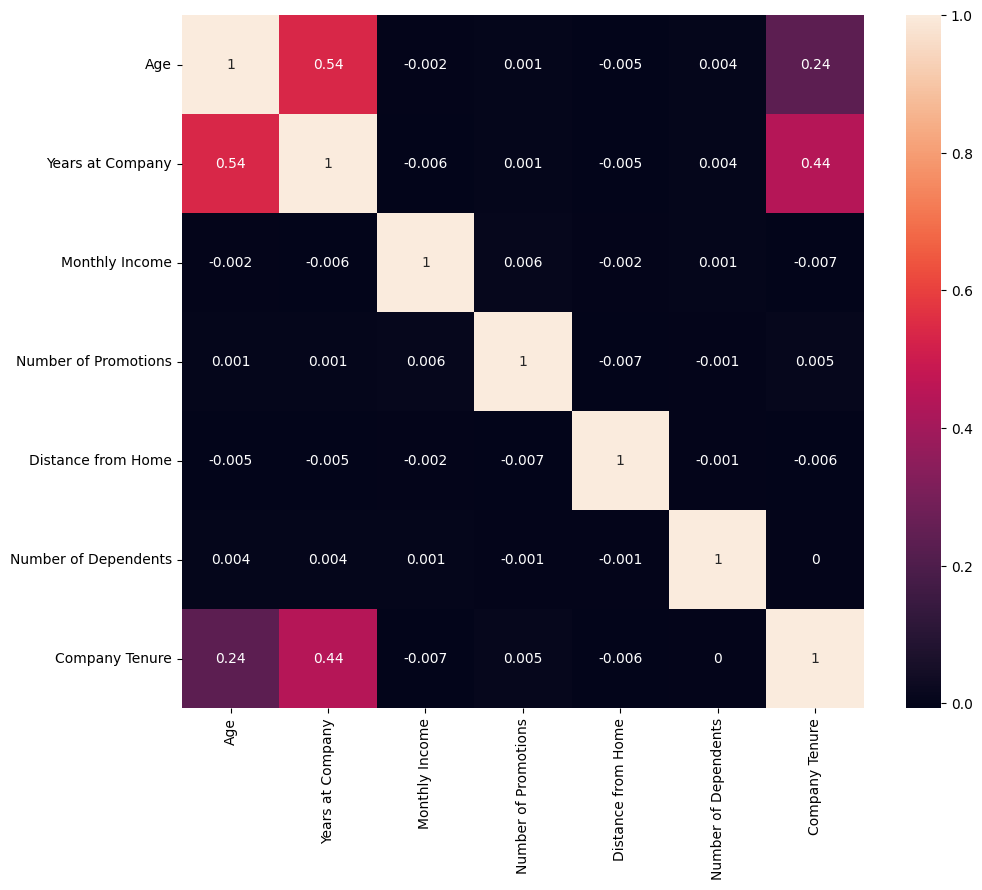

In [27]:
plt.figure(figsize=(11, 9))
data1 = data.drop(columns='Employee ID')
data1 =round(data1.corr(numeric_only=True),3)
sns.heatmap(data1, fmt='.2g', annot=True)

#### From the heatmap we can understand the the most correlated features are:

1.   Age and Years at Company
2.   Tenure and Years at Company
3. Tenure and age




In [31]:
data['Age'].unique()

array([31, 59, 24, 36, 56, 38, 47, 48, 57, 30, 29, 40, 19, 33, 49, 51, 39,
       54, 23, 45, 42, 53, 37, 34, 25, 41, 55, 21, 28, 26, 52, 50, 27, 58,
       43, 35, 46, 44, 20, 18, 22, 32])

In [28]:
# Calculating the mean years at company for each age group
m_years = data.groupby('Age')['Years at Company'].mean()

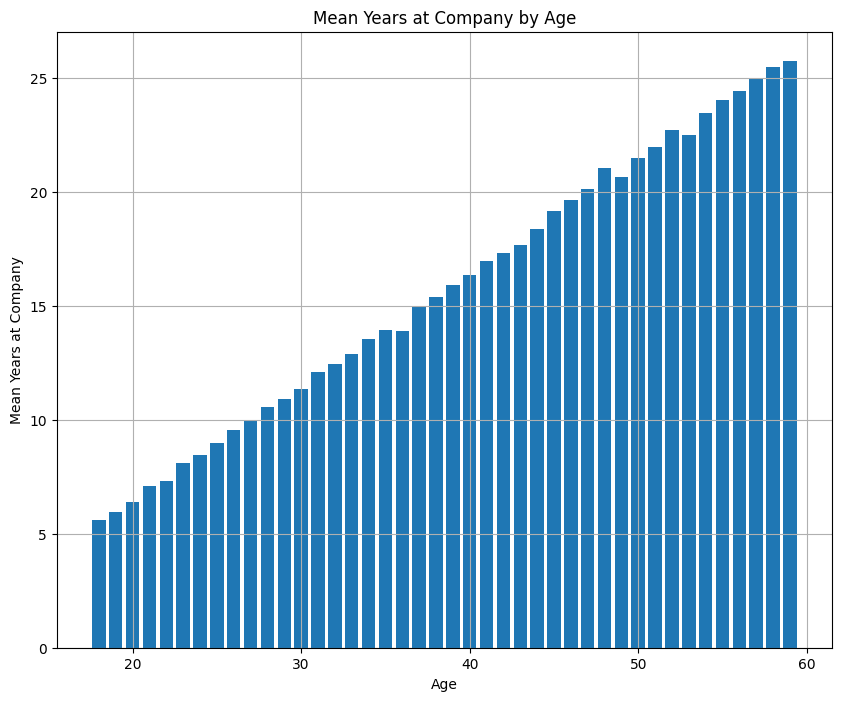

In [30]:
plt.figure(figsize=(10,8))
plt.bar(m_years.index, m_years.values)
plt.title('Mean Years at Company by Age')
plt.xlabel('Age')
plt.ylabel('Mean Years at Company')
plt.grid(True)

## **Data Preprocessing.**

### **Missing value handling.**

In [45]:
data.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           4
Job Satisfaction            0
Performance Rating          4
Number of Promotions        5
Overtime                    0
Distance from Home          0
Education Level             5
Marital Status              4
Number of Dependents        6
Job Level                   5
Company Size                2
Company Tenure              0
Remote Work                 3
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        2
Attrition                   0
dtype: int64

#### Out of the 10 columns containing missing values, 8 are categoricals columns which are filled with their respective mode and the remaining two will be observed for skewness and filled with the necessary measures.

In [51]:
# Taking skewness of the 2 cnumerical columns
cols=['Number of Promotions', 'Number of Dependents']
for columns in cols:
  print(columns,"-",round(data[columns].skew(),2))

Number of Promotions - 0.99
Number of Dependents - 0.71


#### It is observed that the columns are right skewed so the median of the respective columns are used to fill the null values.

In [53]:
for column in cols:
  data[column].fillna(data[column].median(), inplace = True)

#### Filling categorical column with mode.

In [54]:
c_cols=['Work-Life Balance','Performance Rating','Marital Status','Employee Recognition','Remote Work','Company Size','Job Level','Education Level']
for col in c_cols:
    mode_value = data[col].mode()[0]
    data[col].fillna(mode_value, inplace=True)

In [55]:
data.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

### **Outlier detection.**

In [69]:
# selecting the continuous numeric columns
cont_cols=['Age', 'Years at Company', 'Monthly Income', 'Distance from Home',
       'Company Tenure']

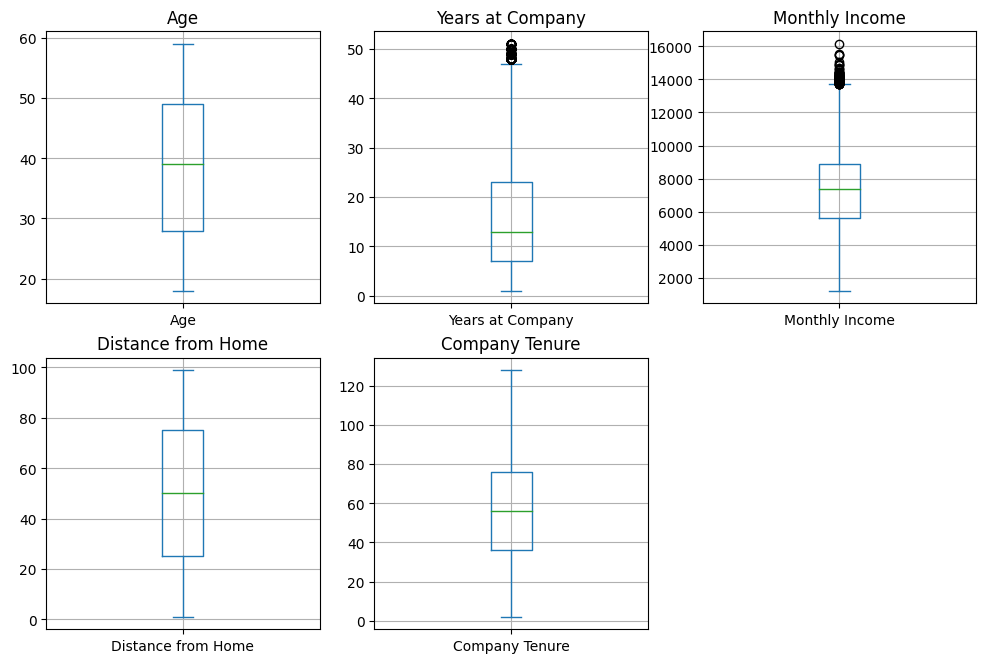

In [71]:
# plotting outliers
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.flatten()  # Flatten the array of axes for easy iteration

# Plot boxplots for each feature
for i, feature in enumerate(cont_cols):
    if feature in data.columns:
        data[feature].plot(kind='box', ax=axes[i], fontsize=10)
        axes[i].set_title(feature)
        axes[i].grid(True)
    else:
      axes[i].set_visible(False)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

#### Only two of the continuous numeric columns contain outliers, which are not treated now as We are taking such models that can deal with outliers themselves.

### **Label Encoding.**
 There are 16 object type columns.

In [72]:
# Select categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns

Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

In [73]:
# Creating a label encoder object
le = LabelEncoder()

# Applying label encoding to each specified column
for column in categorical_columns:
    data[column] = le.fit_transform(data[column])

In [75]:
# displays the first 5 rows
data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,1,19,0,5390,0,2,0,2.0,...,0.0,1,1,89,0,0,0,0,2,1
1,64756,59,0,4,3,5534,3,0,3,3.0,...,3.0,1,1,21,0,0,0,1,1,1
2,30257,24,0,10,2,8159,2,0,3,0.0,...,3.0,1,1,74,0,0,0,3,1,1
3,65791,36,0,7,0,3989,2,0,2,1.0,...,2.0,1,2,50,1,0,0,2,2,1
4,65026,56,1,41,0,4821,1,3,0,0.0,...,0.0,2,1,68,0,0,0,1,2,1


### **Feature Selection.**

#### For Categorical Features.

In [76]:
from sklearn.feature_selection import chi2

In [78]:
X = data[['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition']].values
y = data['Attrition']

# Apply Chi-Square test
chi2_values, p_values = chi2(X, y)

# Create a DataFrame to display the results
chi2_df = pd.DataFrame({'Feature':['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition'],
                        'Chi2 Value': chi2_values,
                        'p-value': p_values})

# Sort by Chi2 value in descending order
chi2_df = chi2_df.sort_values(by='Chi2 Value', ascending=False)

print(chi2_df)

                     Feature   Chi2 Value       p-value
8                  Job Level  5193.455556  0.000000e+00
10               Remote Work  2950.217693  0.000000e+00
7             Marital Status  1486.811313  0.000000e+00
0                     Gender   341.024906  3.816501e-76
3           Job Satisfaction   255.938554  1.317773e-57
6            Education Level   194.564893  3.206077e-44
2          Work-Life Balance   180.675946  3.450129e-41
5                   Overtime   157.398866  4.187868e-36
4         Performance Rating   101.216160  8.247374e-24
13        Company Reputation    41.398441  1.241564e-10
12  Innovation Opportunities    28.971616  7.344664e-08
9               Company Size    19.283210  1.126930e-05
11  Leadership Opportunities    10.193932  1.409035e-03
1                   Job Role     8.285688  3.995877e-03
14      Employee Recognition     0.003181  9.550229e-01


 Top 4 categorical features: Job Level ,Remote Work ,Marital Status ,Gender

#### For Numeric variables.

<Axes: >

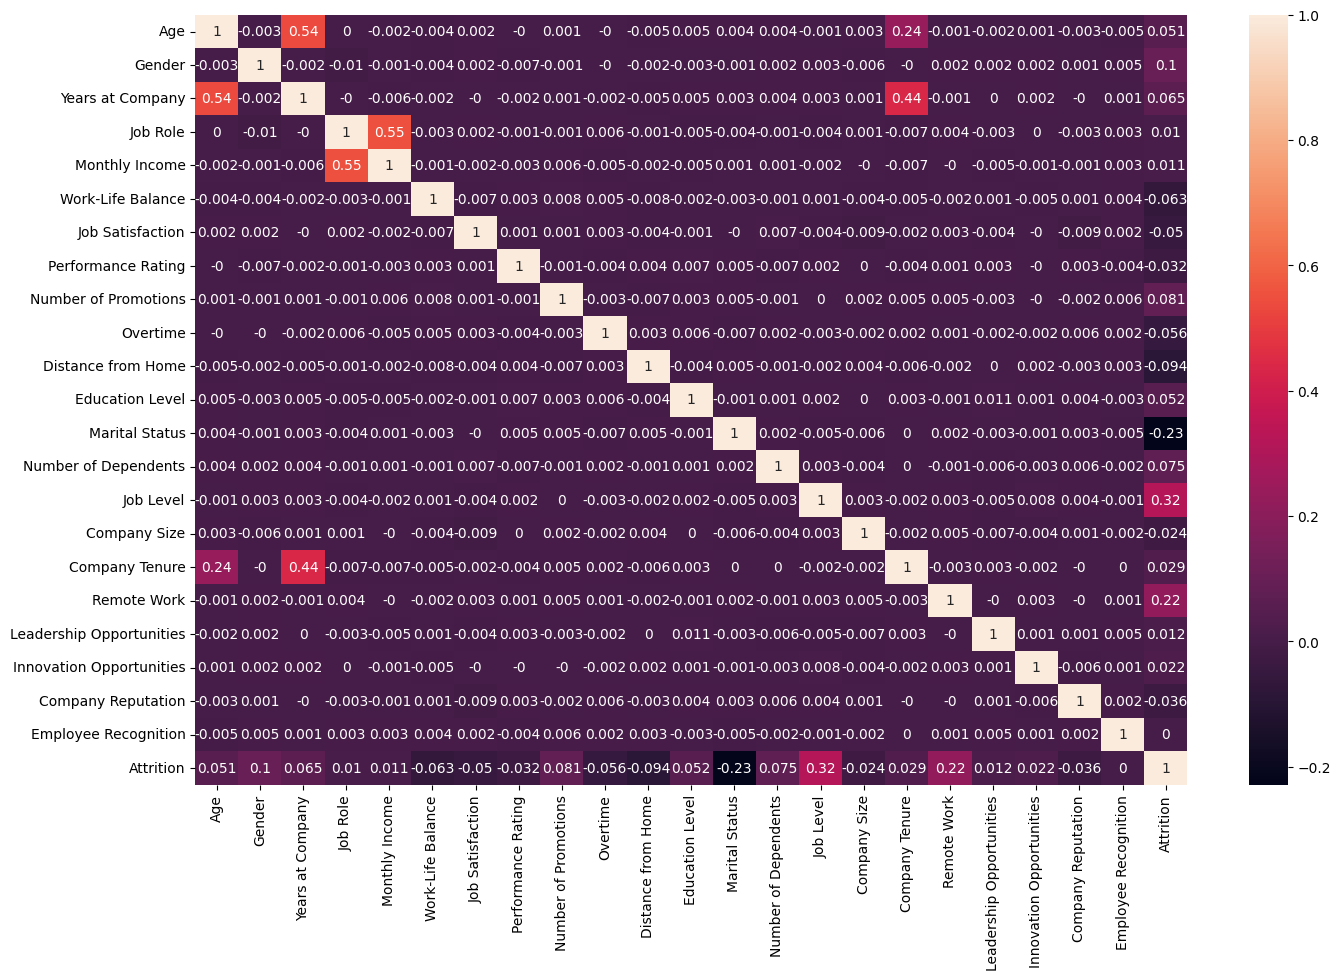

In [81]:
plt.figure(figsize=(16, 10))
data1 = data.drop(columns='Employee ID')
data1 =round(data1.corr(numeric_only=True),3)
sns.heatmap(data1, fmt='.2g', annot=True)

Company Tenure, Years at comapny, Monthly Income are the features selected from correlation matrix.

### **Predictive Model Building.**

In [82]:
data.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

In [85]:
Features = ['Years at Company','Company Tenure','Monthly Income','Job Level','Remote Work','Gender','Marital Status']

data= data.drop(['Employee ID', 'Age','Job Role',
        'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level',
       'Number of Dependents', 'Company Size',
       'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition'], axis=1)

In [86]:
data.columns

Index(['Gender', 'Years at Company', 'Monthly Income', 'Marital Status',
       'Job Level', 'Company Tenure', 'Remote Work', 'Attrition'],
      dtype='object')

#### Normalization/ Scaling is not necessary for the models which are built here. The models themselves give optimized and generalized values, So proceeding without scaling the features here.

In [87]:
# train-test split
from sklearn.model_selection import train_test_split

X= data.drop(columns=['Attrition'])
y= data['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [88]:
pip install xgboost

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

models = {
  'Decision Tree': DecisionTreeClassifier(),
  'Random Forest': RandomForestClassifier(),
  'XGBoost': XGBClassifier(),
  #'SVC': SVC(kernel='rbf')
}

In [97]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred1=model.predict(X_train)

    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_pred1)
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print the results
    print('*'*30)
    print(f'{name} Classifier:')
    print(f'Train Accuracy: {train_accuracy:.4f}')
    print(f'Test Accuracy: {test_accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}\n')

******************************
Decision Tree Classifier:
Train Accuracy: 1.0000
Test Accuracy: 0.6171
Precision: 0.6170
Recall: 0.6171
F1 Score: 0.6170

******************************
Random Forest Classifier:
Train Accuracy: 0.9999
Test Accuracy: 0.6787
Precision: 0.6788
Recall: 0.6787
F1 Score: 0.6788

******************************
XGBoost Classifier:
Train Accuracy: 0.7508
Test Accuracy: 0.7028
Precision: 0.7027
Recall: 0.7028
F1 Score: 0.7027



### **XGBoost Classifier has the highest test accuracy (0.7028), followed closely by Random Forest Classifier (0.6787). Decision Tree Classifier has the lowest test accuracy (0.6171). As our problem is to predict employee attrition, considering the other classification metrics: Here also XGBoost is showing an overall high metrics. Hence we can conclude that XGBoost is the best Classifier for our case study in predicting customer attrition.**

 I tried SVC(Kernel) too, but the model is taking too much time with the output.

### Fine tuning the best model.

In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

xg_param_grid = {
    'max_depth': [7,8,9],
    'learning_rate': [0.2,0.3,0.4],
    'n_estimators': [200, 400,500],
    'reg_alpha': [0.05,0.1, 0.5],
    'reg_lambda': [1, 1.5,2]
}

xg_grid_search = GridSearchCV(estimator=xgb, param_grid=xg_param_grid, cv=10, scoring='accuracy', n_jobs=-1)
xg_grid_search.fit(X_train, y_train)
best_model = xg_grid_search.best_estimator_

print("Best Hyperparameters:", xg_grid_search.best_params_)
print("*"*50)
print("Best Accuracy Score:", round((xg_grid_search.best_score_)*100,2)," %")
test_accuracy = best_model.score(X_test, y_test)
print("Test Set Accuracy:",round((test_accuracy)*100,2)," %" )
best_model.fit(X_train, y_train)
y_pred=best_model.predict(X_test)

precision = round(precision_score(y_test, y_pred, average='weighted')*100,2)
recall = round(recall_score(y_test, y_pred, average='weighted')*100,2)
f1 = round(f1_score(y_test, y_pred, average='weighted')*100,2)

print(f'Precision: {precision} %')
print(f'Recall: {recall} %')
print(f'F1 Score: {f1:.4f} %')
print("*"*50)
print(best_model)